In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from pathlib import Path
import matplotlib.pyplot as plot

In [13]:
import os

In [14]:
%matplotlib inline

In [18]:
#monkey-patch listdir functionality into pathlib
Path.ls = lambda x: os.listdir(str(x))
PATH = Path('../../data/parking')
PATH_TIME = PATH/"time_data.csv"

In [19]:
PATH.ls()

['.ipynb_checkpoints',
 'all.csv',
 'location_data.csv',
 'raw_csv',
 'shared_columns.csv',
 'time_data.csv']

In [33]:
df = pd.read_csv(PATH_TIME)

In [34]:
df.head()

,Due,Sublocatio,Violat,Is Wa,Issue Date,Cite Number,Street,Meter #,Issue T
0,0.0,NaN,X,NO,02/01/2016,5180004964,SEE NOTES,DU2224,13:01
1,50.0,NaN,NP,NO,06/30/2016,5090004298,SEE NOTES,216E,17:14
2,0.0,NaN,X,NO,04/13/2016,5140003457,SEE NOTES,408A,15:25
3,0.0,NaN,X,NO,04/19/2016,5060003463,SEE NOTES,212A,12:46
4,0.0,NaN,PNP,NO,05/02/2016,5230004873,SEE NOTES,NaN,09:00


In [35]:
def flatten_time(t):
    hour, minute = t.split(':')
    return 60*int(hour) + int(minute)

In [54]:
#Add a new column that represents minutes since midnight
df["Time_Flat"] = df["Issue T"].map(flatten_time)

In [55]:
df["Hour"] = df["Issue T"].map(lambda x: x.split(':')[0]).astype("int64")

In [56]:
df["Minute"] = df["Issue T"].map(lambda x: x.split(':')[1]).astype("int64")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207094 entries, 0 to 207093
Data columns (total 12 columns):
Due            207094 non-null float64
Sublocatio     141628 non-null object
Violat         207094 non-null object
Is Wa          207094 non-null object
Issue Date     207094 non-null object
Cite Number    207094 non-null object
Street         207094 non-null object
Meter #        110231 non-null object
Issue T        207094 non-null object
Time_Flat      207094 non-null int64
Hour           207094 non-null int64
Minute         207094 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 20.5+ MB


Let's take a quick look at what columns are available to us since they run off the screen

In [78]:
df["Violat"].value_counts()

X       112330
NPP      15183
S        13281
NP       10559
NSR       8682
NS        4516
PNP       4066
78        4034
97        2772
H         2512
BT        2212
PFH       2203
EX        2052
NPS       1997
NPC       1891
PT2       1554
HO        1371
PSW       1157
LZF       1150
AB        1134
NPG       1011
W          898
NPJ        861
OTH        857
PD         779
PCO        766
PTZ        759
OFF3       675
IP         634
FL         570
         ...  
MU          88
P6          74
OFF2        74
NPZ         65
D           60
PA          58
PSR         53
PT4         47
OM          47
PCV         42
P24         34
RV          31
SD          30
T           28
PT3         25
NPU         22
PB          21
OTC         12
OFF4         9
PMR          8
LIB          7
OFF1         6
IW           5
OA           5
SOS          3
PT1          3
PE           3
LM           2
C            1
DBL          1
Name: Violat, Length: 76, dtype: int64

#### We are only interested in expired meters citations because we want to see what the highest risk times are, so let's grab just those violations

In [80]:
df_meter = df[df["Violat"] == "X"]
df_meter.shape

(112330, 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001814C6DE7F0>,
      dtype=object)

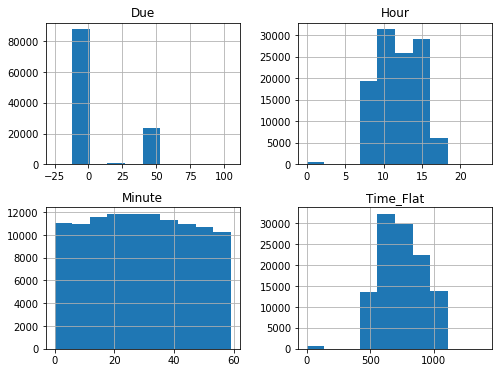

In [82]:
df_meter.hist()

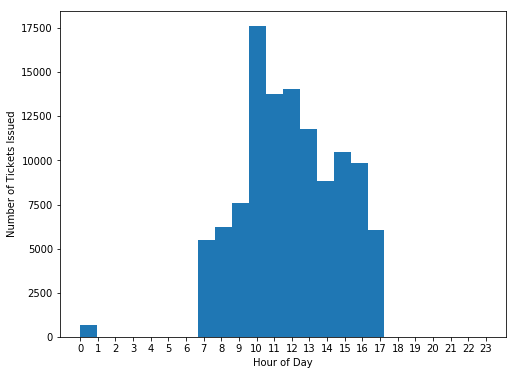

In [83]:
plt.rcParams["figure.figsize"] = (8,6)
plot.hist(df_meter["Hour"], bins=24)
plot.xticks(np.arange(0, 24))
plot.xlabel('Hour of Day');
plot.ylabel('Number of Tickets Issued');

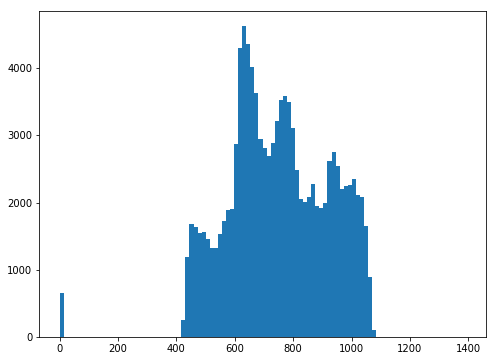

In [86]:
plot.hist(df_meter["Time_Flat"], bins=100);

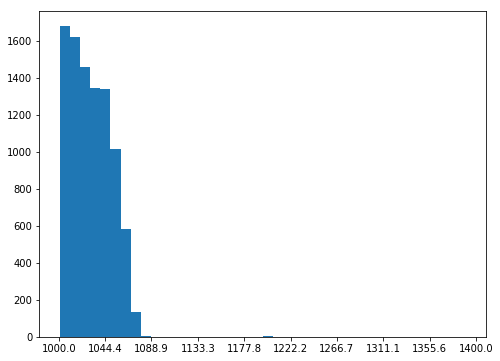

In [98]:
plot.hist(df_meter[df_meter["Time_Flat"] > 1000]["Time_Flat"], bins=40);
plot.xticks(np.linspace(1000, 1400, 10));

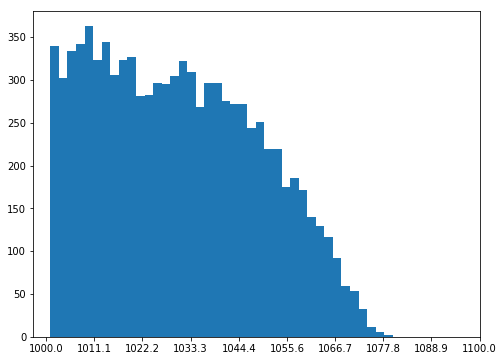

In [102]:
plot.hist(df_meter[(df_meter["Time_Flat"] > 1000)&(df_meter["Time_Flat"] < 1100)]["Time_Flat"], bins=40);
plot.xticks(np.linspace(1000, 1100, 10));

In [103]:
def unflatten_time(t):
    return ":".join(map(str, divmod(t,60)))

In [104]:
unflatten_time(1066)

'17:46'